In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
#初始化参数
input_layer_size=400
hidden_layer_size=25
num_labels=10

In [3]:
mat_data=sio.loadmat('.\machine-learning-exercise-master\coursera-machine-learning-python\ex3\ex3data1.mat')
X=mat_data['X']
y=mat_data['y'].ravel()
m,n=X.shape

In [4]:
#展示图片函数
def display_data(X, tile_width=-1, padding=0):
    m, n = X.shape
    if tile_width < 0:
        tile_width = int(np.round(np.sqrt(n)))
    tile_height = n / tile_width
    display_rows = int(np.floor(np.sqrt(m)))
    display_columns = int(np.ceil(m / display_rows))
    tile_height_padded = tile_height + padding * 2
    tile_width_padded = tile_width + padding * 2
    data = np.zeros((int(display_rows * tile_height_padded), int(display_columns * tile_width_padded)))
    for i in range(display_rows):
        for j in range(display_columns):
            tile = format_tile(X[i * int(display_rows) + j,], int(tile_width), padding)
            tile = tile.T
            data[int(i * tile_height_padded):int((i + 1) * tile_height_padded),
                 int(j * tile_width_padded):int((j + 1) * tile_width_padded)] = tile
    plt.imshow(data, cmap='gray', extent=[0, 1, 0, 1])
def format_tile(x, width=-1, padding=0):
    if width < 0:
        width = int(np.round(np.sqrt(len(x))))
    height = len(x) / width
    tile = np.ones((int(height) + int(padding) * 2, int(width) + int(padding) * 2))
    for i in range(int(padding), int(height) + int(padding)):
        tile[i, padding:(padding + width)] = x[((i - padding) * width):((i - padding) * width + width)]
    return tile

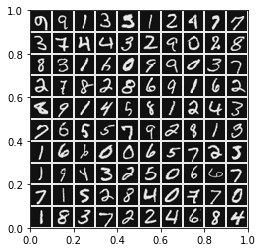

In [5]:
#展示图片
rand_indices=np.random.permutation(m)
sel=X[rand_indices[0:100],:]
plt.figure()
display_data(sel,padding=1)
plt.show()

In [7]:
#导入参数
mat_param=sio.loadmat('.\machine-learning-exercise-master\coursera-machine-learning-python\ex3\ex3weights.mat')
Theta_1=mat_param['Theta1']
Theta_2=mat_param['Theta2']

In [9]:
#定义预测函数--输出最大概率索引
def predict(Theta_1,Theta_2,X):
    m,n=X.shape
    X=np.hstack((np.ones((m,1)),X))
    A_1=sigmoid(X.dot(Theta_1.T))
    A_1=np.hstack((np.ones((m,1)),A_1))
    A_2=sigmoid(A_1.dot(Theta_2.T))
    p=np.argmax(A_2,axis=1)
    p+=1
    return p
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [12]:
#预测准确率
pred=predict(Theta_1,Theta_2,X)
print("Traning set Accuracy:",np.mean(pred==y)*100)

Traning set Accuracy: 97.52


展示样例图片
Neural Net预测：[3](数字 [3])


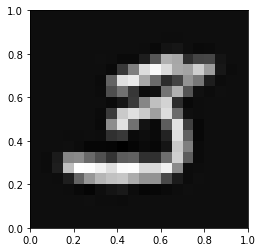

展示样例图片
Neural Net预测：[2](数字 [2])


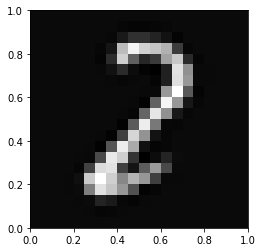

展示样例图片
Neural Net预测：[1](数字 [1])


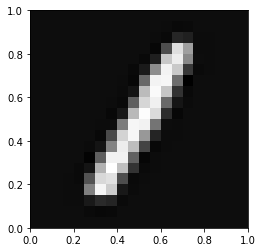

展示样例图片
Neural Net预测：[8](数字 [8])


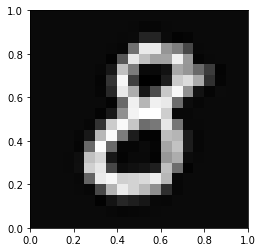

展示样例图片
Neural Net预测：[3](数字 [3])


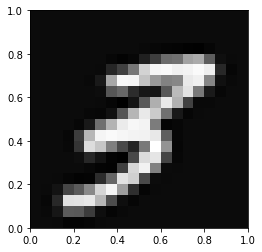

In [13]:
rp=np.random.permutation(m)
for i in range(5):
    print('展示样例图片')
    display_data(X[rp[i],].reshape(1,n))
    pred=predict(Theta_1,Theta_2,X[rp[i],].reshape(1,n))
    print('Neural Net预测：{}(数字 {})'.format(pred,pred % 10))
    plt.show()